In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# 计算体积
# input: npz_path, pkl_path
# output: V

def Volume(npz_path, pkl_path):
    npz = np.load(npz_path)
    pkl = pickle.load(open(pkl_path, 'rb'))
    seg = npz['seg']
    spacing = pkl['spacing']
    # print(f"    {spacing}\n")
    V = np.prod(np.abs(spacing)) * np.sum(seg==1)
    return V

In [5]:
# 计算/nnUNetPlans_3d_fullres/中的所有sample体积

i_V_pairs = []

for i in range(289):
    index = '{:03d}'.format(i)
    path = '/root/liver_tumor_segmentation/Code/nnUNet_preprocessed/Dataset501_LiverTumor/nnUNetPlans_3d_fullres/'
    npz_path = path + index + '.npz'
    pkl_path = path + index + '.pkl'
    V = Volume(npz_path, pkl_path)
    i_V_pairs.append((i, V))
    print(f"index={index}, V={V}")

i_V_array = np.array(i_V_pairs)
print()
print(f"i_V_array shape: {i_V_array.shape}")  # (289, 2) 第一列为i，第二列为V

index=000, V=407.49304509967
index=001, V=29442.494262695312
index=002, V=10147.38243174331
index=003, V=8997.027603261035
index=004, V=1369407.5265359408
index=005, V=1220326.236358389
index=006, V=627699.8730364257
index=007, V=1145.3953612236262
index=008, V=740111.7668816572
index=009, V=8415565.61248496
index=010, V=12995.716202638949
index=011, V=19499.470357128488
index=012, V=11217.83515043722
index=013, V=3038393.0779354996
index=014, V=1380181.8969726562
index=015, V=2653639.6388582336
index=016, V=713771.9885106953
index=017, V=114993.68914660996
index=018, V=65305.83585470958
index=019, V=2342971.1626928025
index=020, V=455994.5682373047
index=021, V=817054.1592697401
index=022, V=1762.9652107146137
index=023, V=416291.1715568694
index=024, V=8862.809951782227
index=025, V=216428.15446853638
index=026, V=509924.9482437558
index=027, V=13809.922119140625
index=028, V=18908.916419024732
index=029, V=202648.974609375
index=030, V=17126.10626220703
index=031, V=177.881968673346

In [6]:
# 按照体积将index排序

V_array = i_V_array[:, 1]
sorted_pos = V_array.flatten().argsort()
print(sorted_pos)

[ 31   0  81 133 180  87 149   7 183  22 117  58 163  42 160  94 195 247
 254  93 260  73  91  24   3 216 142   2 178 129 203 189  12 222  43 274
 261 174  10  89  27 175  30  77 171 140  28  11 214 273  41 230 223  67
 198 226 245   1  45 159 104 283 193 132 256 231 287 224 107 173 176 131
 194 284 201 109 267 155  59  18 258 191 202 161 164  78  38 207  74 280
 263 240 185 137 110 262 172 235 106  98 177 220 127  17 147 156 169 269
 102 151 150  64  53 228 181 125  34 213  44 136 167  84  47 196 210 157
  86 221  29 186 187 192  25 100 101 120  70 145 126  65 158 103  99 249
 153 122 232 116 170  90 128 143 242 115 108 234  71 124  32 162 123 138
 200 205  23 199 268 211  20 212 243  88  83 236 119  26 146 227 112 105
 229  51 270  72 252 281   6 154 188  50 288 218 114  16  92  33   8  48
 215 134 184  75 271  21  68 182 276 251 244 209  39 130 135 197 208 165
 168 148  36 285 141 264  66 206  57  55 233 259 217 253 204 152   5 113
 111  69  40 139   4  14 121 246 118  52 166 190  9

In [24]:
# 分析V_array

# 找出矩阵中第一大元素的位置
first_largest_value = V_array[sorted_pos[-1]]
first_largest_position = sorted_pos[-1]
print("矩阵中第一大元素是：")
print(first_largest_value)
print("矩阵中第一大元素的位置是：")
print(first_largest_position)
print()

# 找出矩阵中第二大元素的位置
second_largest_value = V_array[sorted_pos[-2]]
second_largest_position = sorted_pos[-2]
print("矩阵中第二大元素是：")
print(second_largest_value)
print("矩阵中第二大元素的位置是：")
print(second_largest_position)
print()

# 找出矩阵中第三大元素的位置
third_largest_value = V_array[sorted_pos[-3]]
third_largest_position = sorted_pos[-3]
print("矩阵中第三大元素是：")
print(third_largest_value)
print("矩阵中第三大元素的位置是：")
print(third_largest_position)
print()

# mean & variance & min &max
mean_value = np.mean(V_array)
variance_value = np.var(V_array)
min_val = min(V_array)
max_val = max(V_array)
median = np.median(V_array)
print("mean =", mean_value)
print("variance =", variance_value)
print("min =", min_val)
print("max =", max_val)
print("median =", median)

矩阵中第一大元素是：
2672649181.365967
矩阵中第一大元素的位置是：
76

矩阵中第二大元素是：
343851197.531291
矩阵中第二大元素的位置是：
62

矩阵中第三大元素是：
8415565.61248496
矩阵中第三大元素的位置是：
9

mean = 11174459.118575025
variance = 2.5002571765006256e+16
min = 177.88196867334693
max = 2672649181.365967
median = 294985.2996826172


range_min = 177.88196867334693
range_max = 2672649181.365967


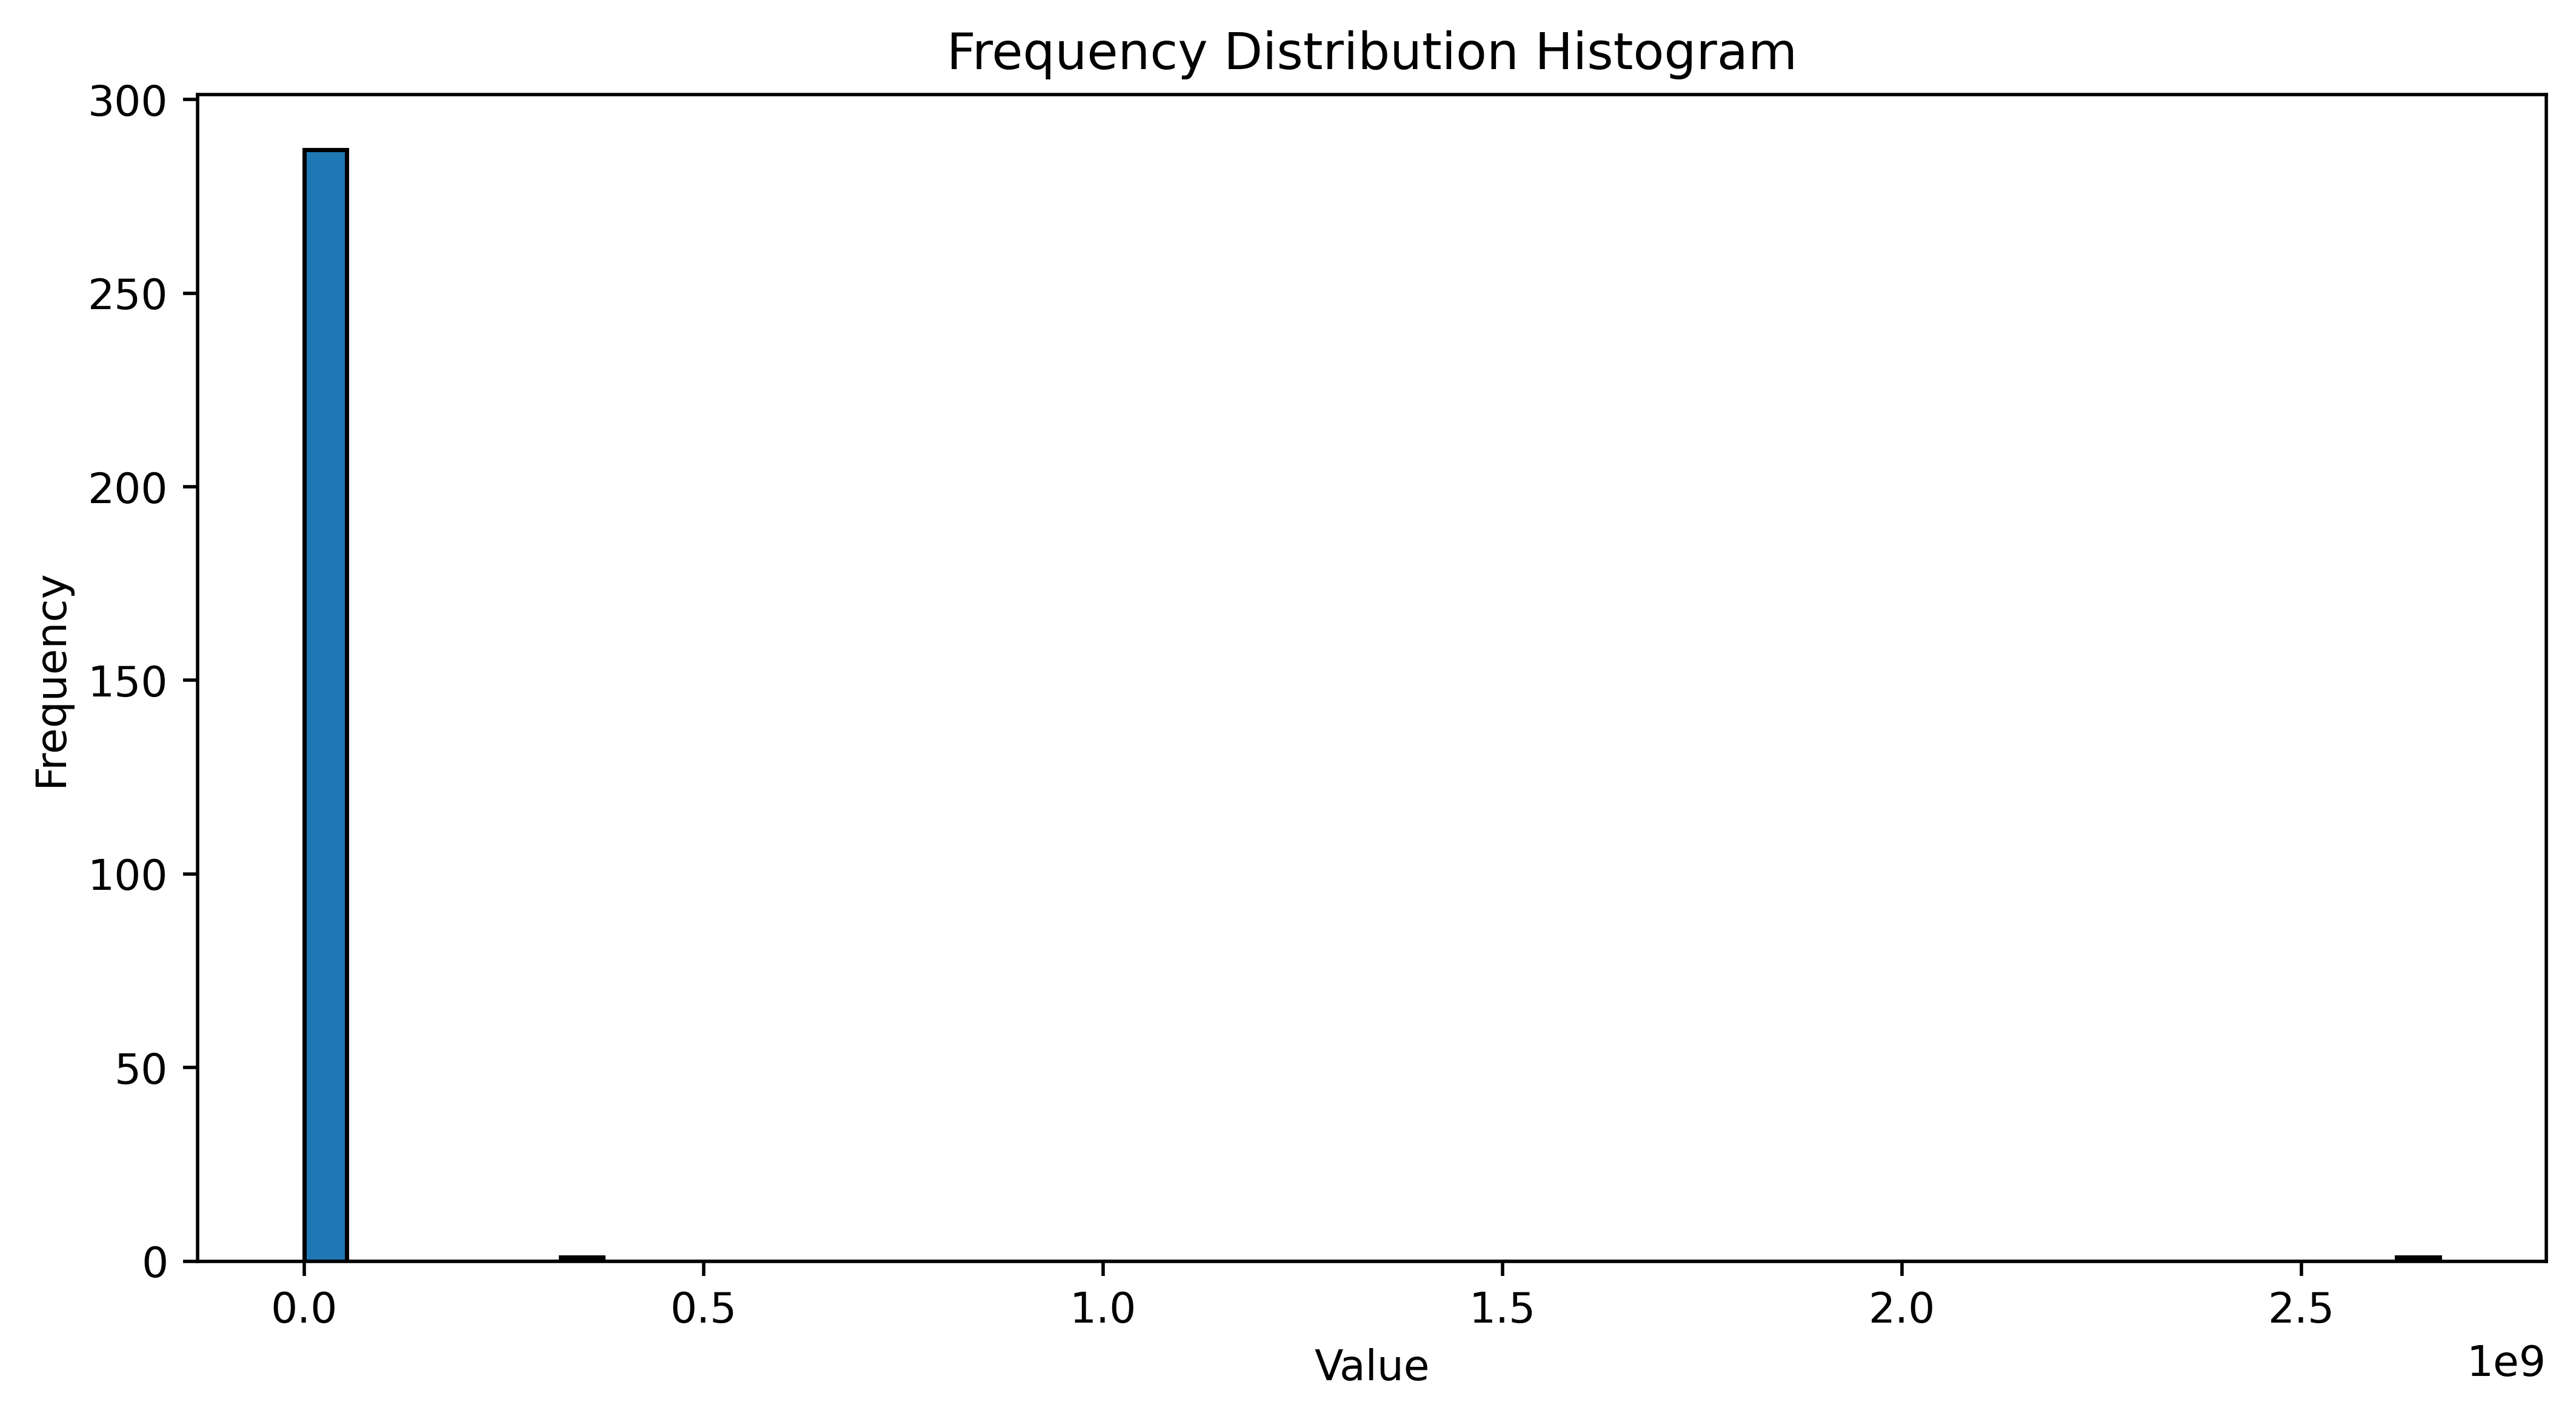

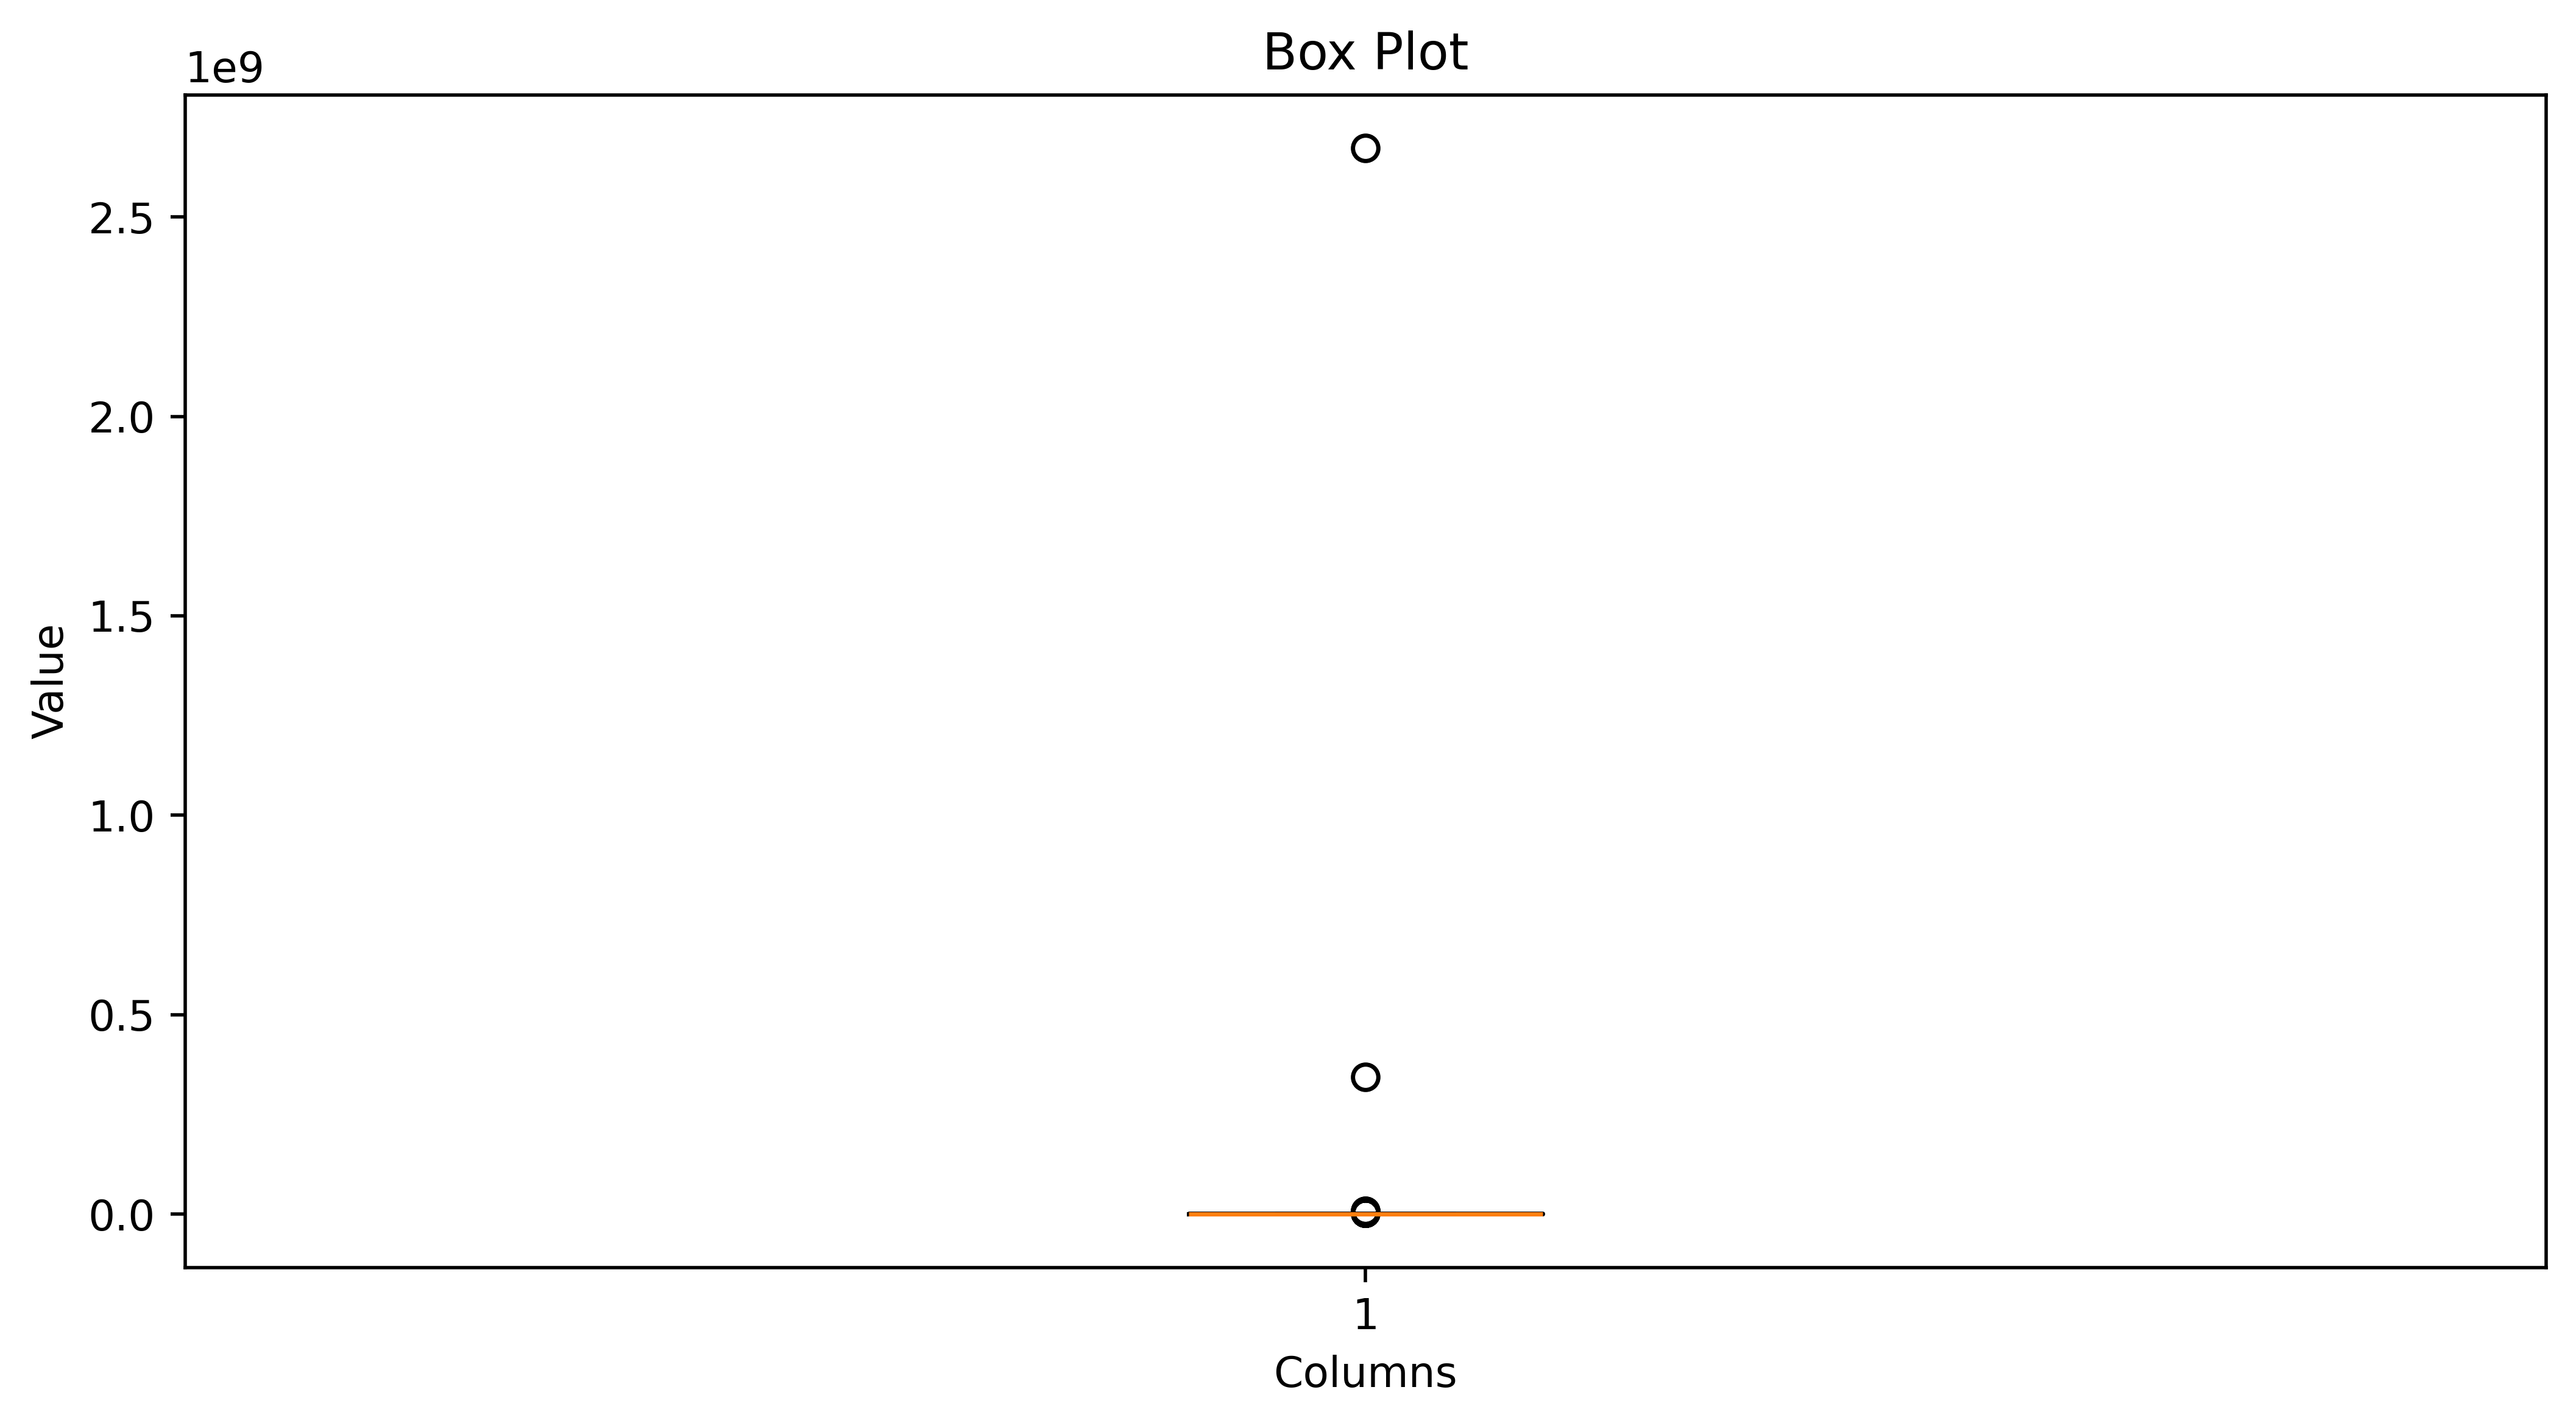

In [14]:
# 绘图（原始数据）

# 绘制频度直方图（原始数据）
num_bins = 50
range_min = min_val
range_max = max_val
print(f'range_min = {range_min}')
print(f'range_max = {range_max}')

plt.figure(dpi=500, figsize=(10, 5))
plt.hist(V_array, bins=num_bins, range=(range_min, range_max), edgecolor='black')
plt.title('Frequency Distribution Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 画出矩阵的箱线图（原始数据）
plt.figure(dpi=500, figsize=(10, 5))
plt.boxplot(V_array)
plt.title('Box Plot')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.show()

range_min = 177.88196867334693
range_max = 8415565.61248496


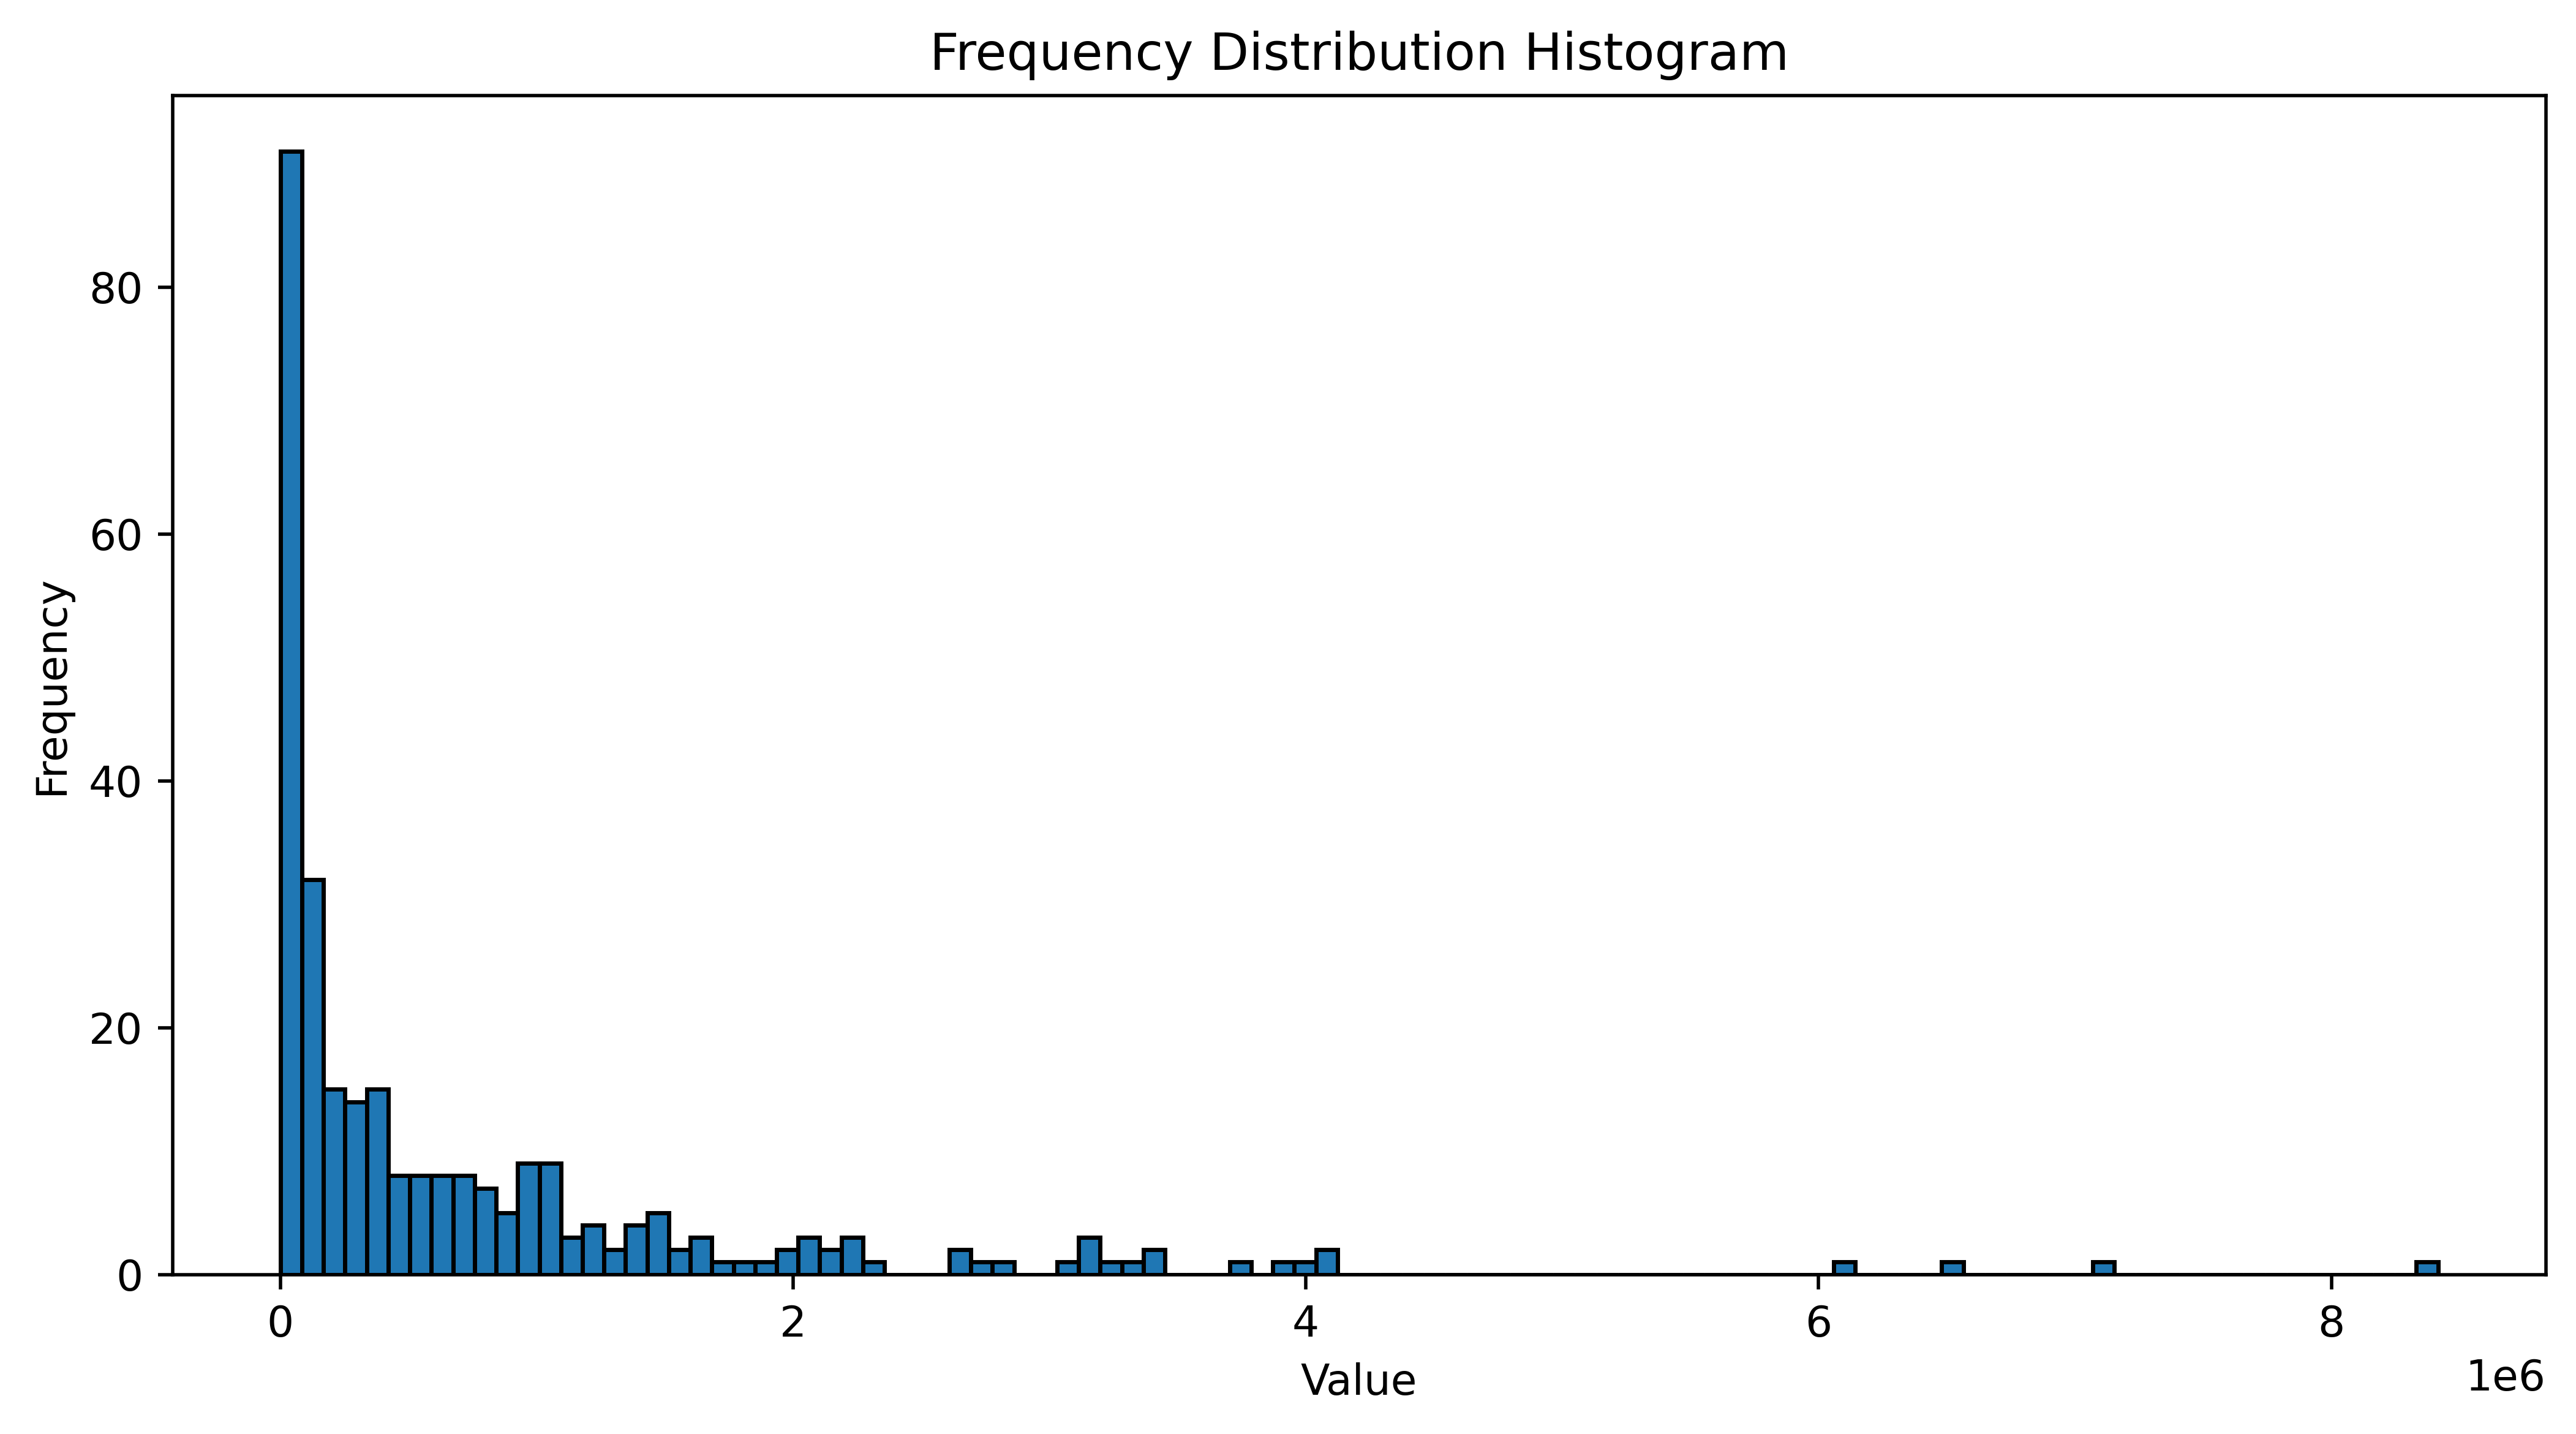

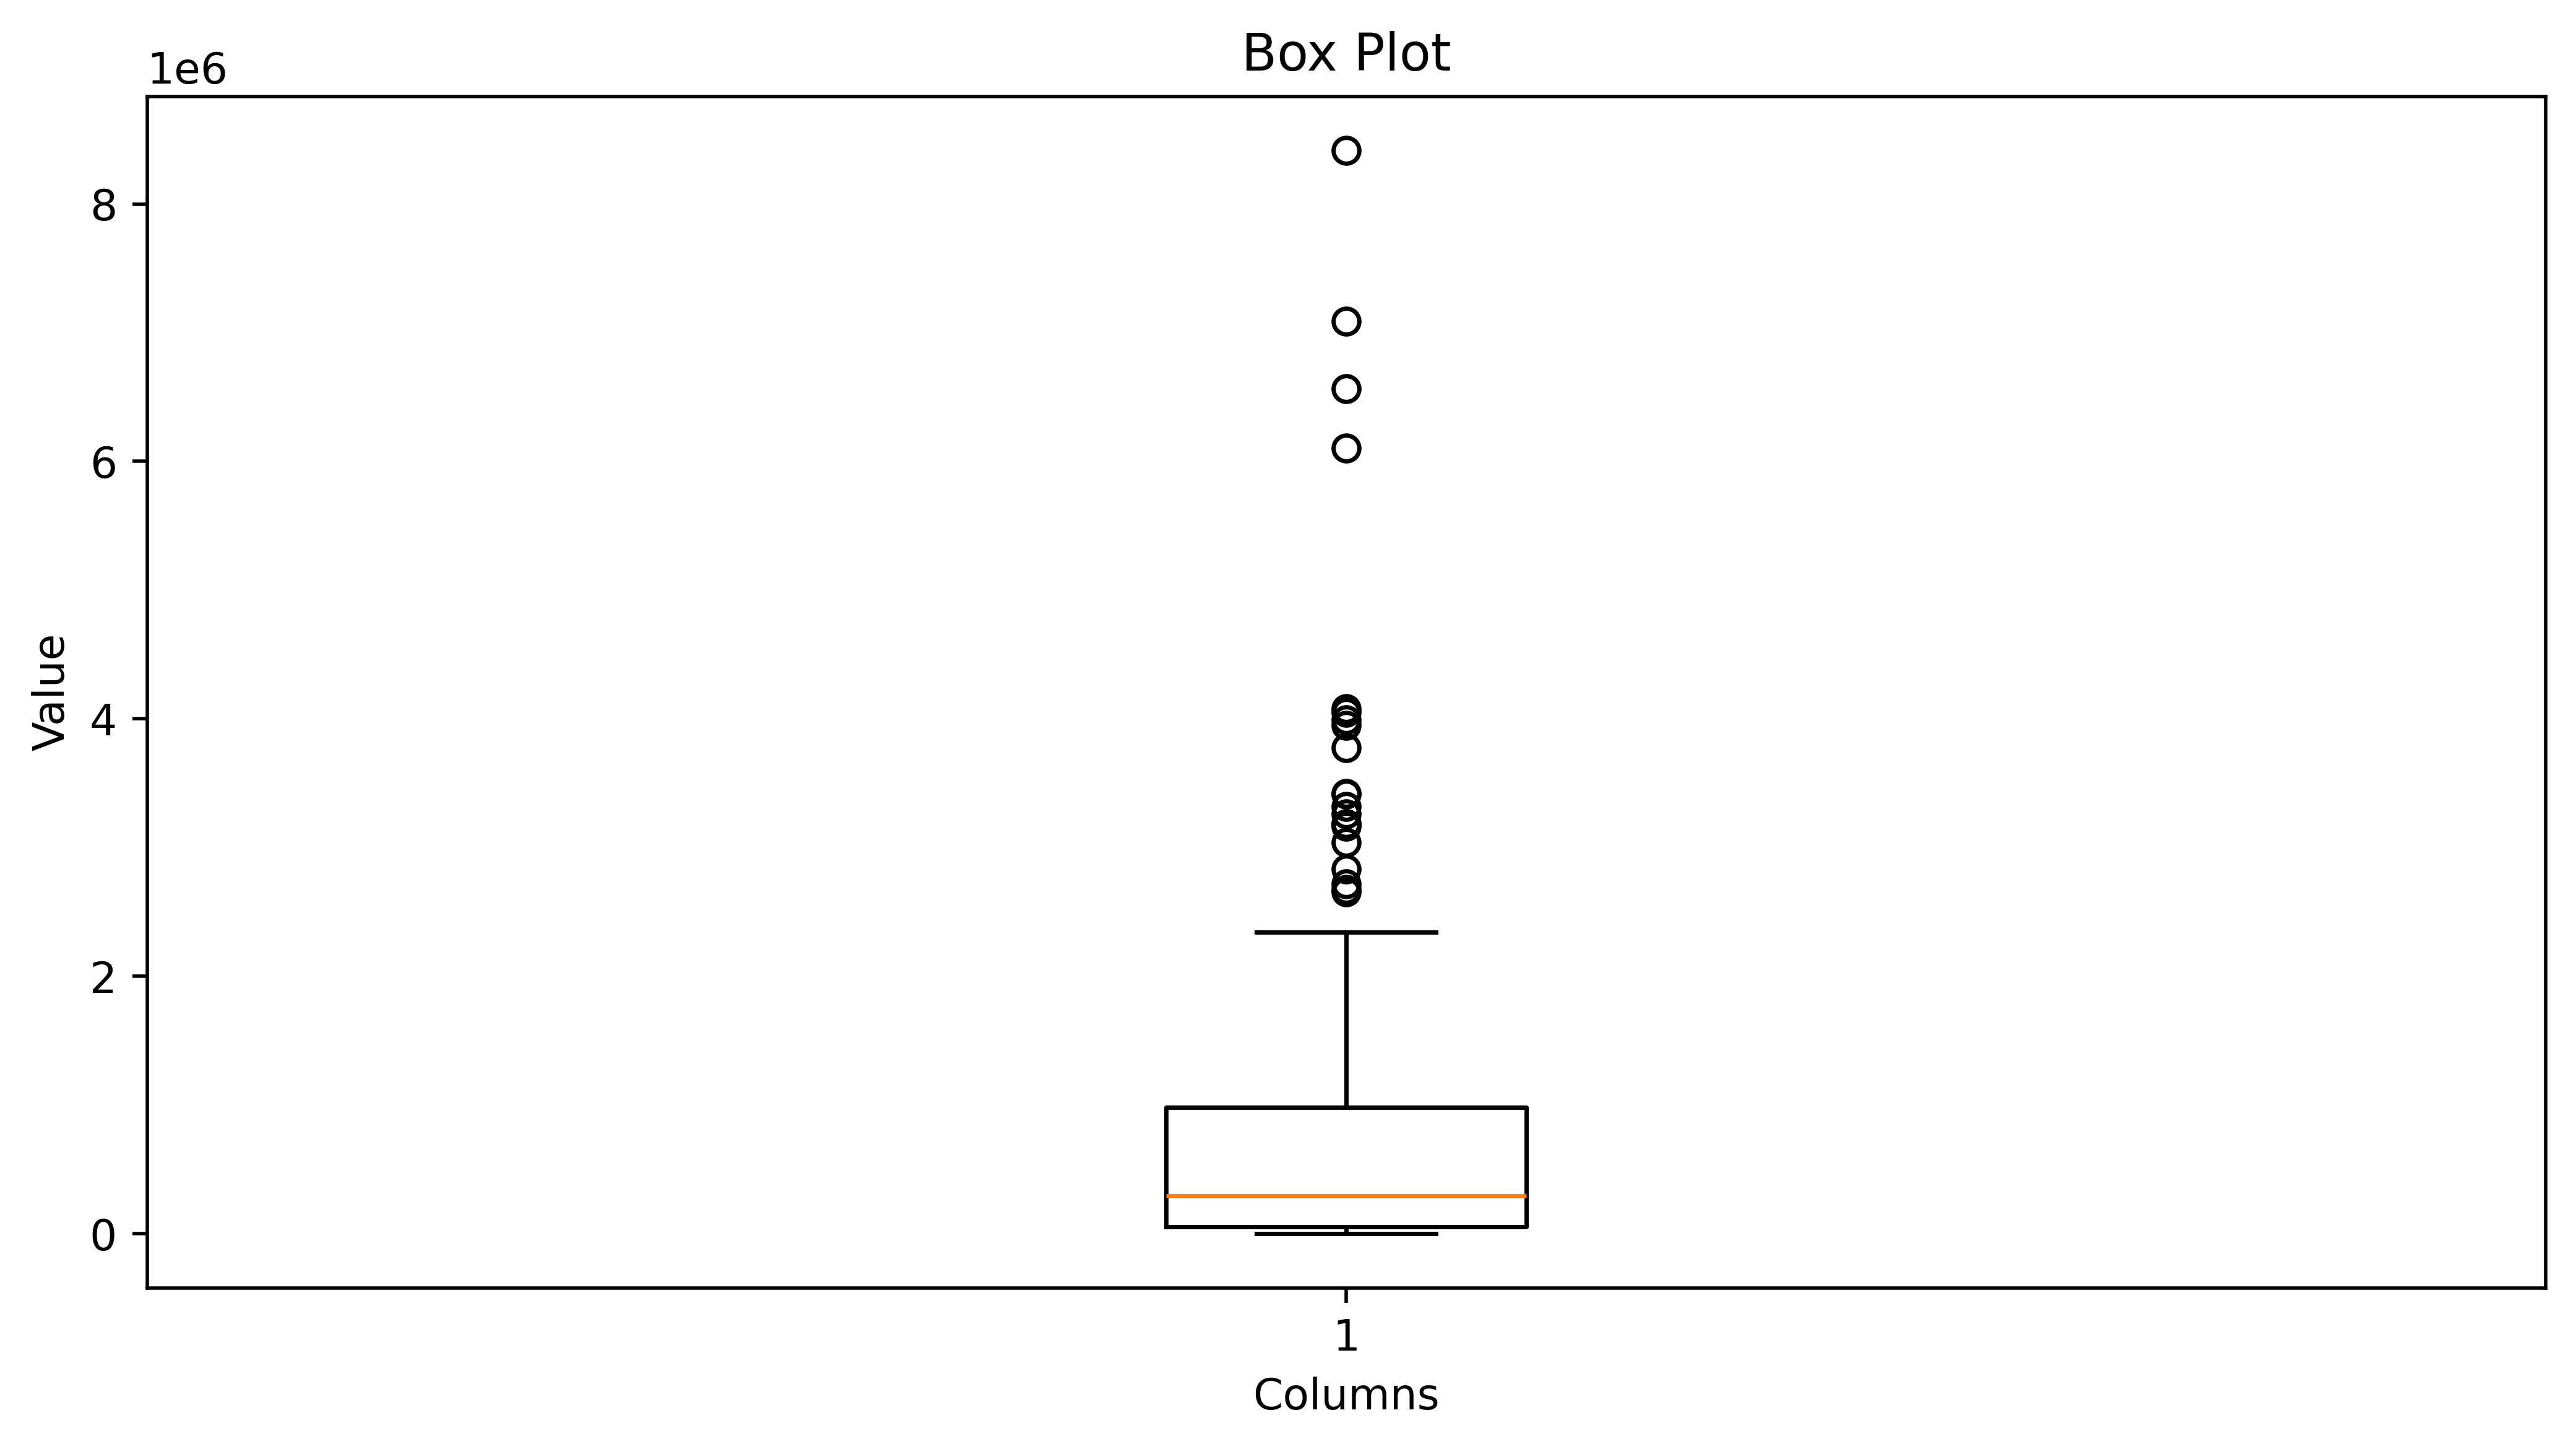

In [16]:
# 绘图（去除两个离群值后的数据）

# 绘制频度直方图（去除两个离群值后的数据）
num_bins = 100
range_min = min_val
range_max = third_largest_value
print(f'range_min = {range_min}')
print(f'range_max = {range_max}')

plt.figure(dpi=500, figsize=(10, 5))
plt.hist(V_array, bins=num_bins, range=(range_min, range_max), edgecolor='black')
plt.title('Frequency Distribution Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 箱线图（去除两个离群值后的数据）
i_V_array_sorted = i_V_array[i_V_array[:, 1].argsort()]
plt.figure(dpi=500, figsize=(10, 5))
plt.boxplot(i_V_array_sorted[:287, 1])
plt.title('Box Plot')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.show()

In [17]:
# 按照第二列(V)升序排列i_V_array

i_V_array_sorted = i_V_array[i_V_array[:, 1].argsort()]
print(i_V_array_sorted.shape)
print(i_V_array_sorted)

(289, 2)
[[3.10000000e+01 1.77881969e+02]
 [0.00000000e+00 4.07493045e+02]
 [8.10000000e+01 4.47687563e+02]
 [1.33000000e+02 5.10946655e+02]
 [1.80000000e+02 5.96228027e+02]
 [8.70000000e+01 8.46458312e+02]
 [1.49000000e+02 1.12571411e+03]
 [7.00000000e+00 1.14539536e+03]
 [1.83000000e+02 1.43421021e+03]
 [2.20000000e+01 1.76296521e+03]
 [1.17000000e+02 1.83466187e+03]
 [5.80000000e+01 2.59850579e+03]
 [1.63000000e+02 2.62922777e+03]
 [4.20000000e+01 2.64279553e+03]
 [1.60000000e+02 3.47577209e+03]
 [9.40000000e+01 3.60175819e+03]
 [1.95000000e+02 3.83395386e+03]
 [2.47000000e+02 3.85139495e+03]
 [2.54000000e+02 4.02846388e+03]
 [9.30000000e+01 5.39493060e+03]
 [2.60000000e+02 5.98117529e+03]
 [7.30000000e+01 6.33866290e+03]
 [9.10000000e+01 7.30456048e+03]
 [2.40000000e+01 8.86280995e+03]
 [3.00000000e+00 8.99702760e+03]
 [2.16000000e+02 9.67609863e+03]
 [1.42000000e+02 1.00379883e+04]
 [2.00000000e+00 1.01473824e+04]
 [1.78000000e+02 1.06416321e+04]
 [1.29000000e+02 1.06616547e+04]
 

In [20]:
# 打印中位数的index和V
print(f"index = {int(i_V_array_sorted[289//2, 0])}, V = {i_V_array_sorted[289//2, 1]}")

index = 153, V = 294985.2996826172


In [27]:
# 将i_V_array从中间一分为二
mid_index = len(i_V_array_sorted) // 2  # 144
small_tumor = i_V_array_sorted[:mid_index]
big_tumor = i_V_array_sorted[mid_index:]

# 可选：打印small_tumor和large_tumor的形状或内容以验证
print("small_tumor shape:", small_tumor.shape)
print("large_tumor shape:", big_tumor.shape)

small_tumor shape: (144, 2)
large_tumor shape: (145, 2)


In [30]:
print("small_tumor\n", small_tumor)
print("big_tumor\n", big_tumor)

small_tumor
 [[3.10000000e+01 1.77881969e+02]
 [0.00000000e+00 4.07493045e+02]
 [8.10000000e+01 4.47687563e+02]
 [1.33000000e+02 5.10946655e+02]
 [1.80000000e+02 5.96228027e+02]
 [8.70000000e+01 8.46458312e+02]
 [1.49000000e+02 1.12571411e+03]
 [7.00000000e+00 1.14539536e+03]
 [1.83000000e+02 1.43421021e+03]
 [2.20000000e+01 1.76296521e+03]
 [1.17000000e+02 1.83466187e+03]
 [5.80000000e+01 2.59850579e+03]
 [1.63000000e+02 2.62922777e+03]
 [4.20000000e+01 2.64279553e+03]
 [1.60000000e+02 3.47577209e+03]
 [9.40000000e+01 3.60175819e+03]
 [1.95000000e+02 3.83395386e+03]
 [2.47000000e+02 3.85139495e+03]
 [2.54000000e+02 4.02846388e+03]
 [9.30000000e+01 5.39493060e+03]
 [2.60000000e+02 5.98117529e+03]
 [7.30000000e+01 6.33866290e+03]
 [9.10000000e+01 7.30456048e+03]
 [2.40000000e+01 8.86280995e+03]
 [3.00000000e+00 8.99702760e+03]
 [2.16000000e+02 9.67609863e+03]
 [1.42000000e+02 1.00379883e+04]
 [2.00000000e+00 1.01473824e+04]
 [1.78000000e+02 1.06416321e+04]
 [1.29000000e+02 1.06616547e+0

In [ ]:
import os
import shutil

# 定义原始文件夹和目标文件夹的路径
source_folder = "/root/liver_tumor_segmentation/Code/nnUNet_preprocessed/Dataset501_LiverTumor/nnUNetPlans_3d_fullres"
small_tumor_folder = "/root/liver_tumor_segmentation/small_tumor"
big_tumor_folder = "/root/liver_tumor_segmentation/big_tumor"

# 创建目标文件夹
os.makedirs(small_tumor_folder, exist_ok=True)
os.makedirs(big_tumor_folder, exist_ok=True)

# 定义一个函数来复制文件
def copy_files(tumor_array, target_folder):
    for i, _ in tumor_array:
        print(int(i))
        for ext in ['.npz', '.pkl']:
            file_name = '{:03d}'.format(int(i)) + ext
            source_path = os.path.join(source_folder, file_name)
            target_path = os.path.join(target_folder, file_name)
            shutil.copy(source_path, target_path)
    print("over\n")

# 复制small_tumor和large_tumor中的文件
copy_files(small_tumor, small_tumor_folder)
copy_files(big_tumor, big_tumor_folder)